In [3]:
import dill

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [8]:
net_xvec = nn.Sequential(net1,net2,net3,net4,net5,SP,FC)
net_xvec.cuda()

Sequential(
  (0): TDNN()
  (1): TDNN()
  (2): TDNN()
  (3): TDNN()
  (4): TDNN()
  (5): StatsPooling()
  (6): FullyConnected(
    (hidden1): Linear(in_features=3000, out_features=512, bias=True)
    (hidden2): Linear(in_features=512, out_features=512, bias=True)
  )
)

In [18]:
wav_path = r"D:\Downloads\Lecture 1.2 — Introduction Supervised Learning — [ Machine Learning  Andrew Ng ].wav"
max_total_context_test = 400
_min,_max = float('inf'),-float('inf')
X_test = []
rate, wav = wavfile.read(wav_path)
for chunked_wav in tqdm(chunks(wav,int(len(wav)/4))):
    X_sample = mfcc(chunked_wav,samplerate= rate,numcep=24
           ,nfilt=26,nfft=1024)
    _min = min(np.amin(X_sample),_min)
    _max = max(np.amax(X_sample),_max)
    for chunked_X_sample in list(chunks(X_sample,max_total_context_test)):
            if len(chunked_X_sample) == max_total_context_test:
                X_test.append(chunked_X_sample)
X_test = (X_test - _min) / (_max-_min)


0it [00:00, ?it/s]WARNING:root:frame length (1103) is greater than FFT size (1024), frame will be truncated. Increase NFFT to avoid.
1it [00:03,  3.70s/it]WARNING:root:frame length (1103) is greater than FFT size (1024), frame will be truncated. Increase NFFT to avoid.
2it [00:06,  3.35s/it]WARNING:root:frame length (1103) is greater than FFT size (1024), frame will be truncated. Increase NFFT to avoid.
3it [00:08,  3.02s/it]WARNING:root:frame length (1103) is greater than FFT size (1024), frame will be truncated. Increase NFFT to avoid.
4it [00:10,  2.75s/it]


In [20]:
X_test.shape

(372, 400, 24)

In [13]:
ng_outout = net_xvec(torch.tensor(X_test[200:230]).cuda())

mel size: 24
sequence length: 400


RuntimeError: cuDNN error: CUDNN_STATUS_BAD_PARAM

In [28]:
np_ng_output = ng_outout.cpu().detach().numpy()

In [64]:
xvecs_collection = {0:[],1:[],2:[],3:[]}

In [67]:

for i, data in enumerate(trainloader, 0):
    a = time.time()
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs, labels = inputs.cuda(), labels.cuda()
    output= net_xvec(inputs).cuda()
    for j,out in enumerate(output):
        index_to_append = int(torch.argmax(labels[j]))
        xvecs_collection[index_to_append].append(out.detach().cpu().numpy())
        print ('appending to {}'.format(index_to_append))

mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 1
appending to 1
appending to 1
appending to 0
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 1
appending to 1
appending to 3
appending to 3
appending to 0
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence len

sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 1
appending to 0
appending to 3
appending to 3
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 3
appending to 1
appending to 1
appending to 0
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
outp

sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 2
appending to 0
appending to 3
appending to 1
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 1
appending to 0
appending to 0
appending to 0
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 3
appending to 3
appendin

output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 3
appending to 3
appending to 3
appending to 3
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 1
appending to 0
appending to 3
appending to 0
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size(

output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 2
appending to 0
appending to 2
appending to 3
appending to 0
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 3
appending to 3
appending to 1
appending to 0
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size(

output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 3
appending to 3
appending to 0
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 3
appending to 2
appending to 1
appending to 1
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 3
appending to 0
appending to 3
appending to 1

output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 0
appending to 0
appending to 0
appending to 2
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 2
appending to 3
appending to 1
appending to 1
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size(

output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 1
appending to 2
appending to 1
appending to 2
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 1
appending to 1
appending to 1
appending to 3
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size(

output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 1
appending to 1
appending to 1
appending to 2
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 2
appending to 1
appending to 3
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 2
appending to 3
appending to 3

output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 2
appending to 3
appending to 0
appending to 3
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 3
appending to 0
appending to 1
appending to 1
appending to 3
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size(

output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 0
appending to 3
appending to 0
appending to 0
appending to 0
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size([5, 385, 512])
mel size: 512
sequence length: 385
output shape: torch.Size([5, 384, 1500])
appending to 2
appending to 0
appending to 2
appending to 2
appending to 1
mel size: 24
sequence length: 400
output shape: torch.Size([5, 396, 512])
mel size: 512
sequence length: 396
output shape: torch.Size([5, 392, 512])
mel size: 512
sequence length: 392
output shape: torch.Size([5, 386, 512])
mel size: 512
sequence length: 386
output shape: torch.Size(

In [9]:
with open(r"D:\ml+dl+dsp\xvector\celebs_xvectors",'rb') as f:
    xvecs_collection= pickle.load(f)

In [43]:
clases = ['Trump','Macron','Gaga','Clinton','Andrew_ng']

In [10]:
lda = LDA(n_components=3)

In [11]:
X = []
y = []
for class_num in range(len(xvecs_collection)):
    for item in xvecs_collection[class_num]:
        X.append(item)
        y.append(class_num)

In [12]:
## Add untrained andrew ng to the test set
for item in np_ng_output:
    X.append(item)
    y.append(4)

NameError: name 'np_ng_output' is not defined

In [56]:
lda_model = lda.fit(X,y)

C:\Users\Daniel\.conda\envs\pytorch\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [58]:
transformed_X= lda_model.transform(X)

In [59]:
clases_dict = {0:[],1:[],2:[],3:[],4:[]}

In [60]:
for i,x in enumerate(transformed_X):
    clases_dict[y[i]].append(x)

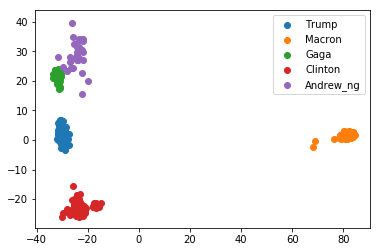

In [61]:
for index in clases_dict:
    plt.scatter(np.array(clases_dict[index])[:,0],np.array(clases_dict[index])[:,1])
plt.legend(clases)

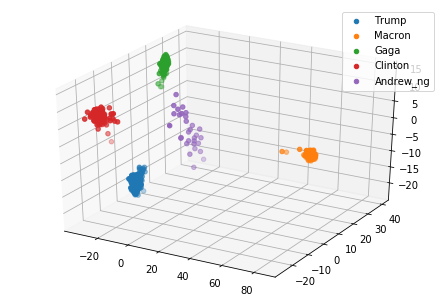

In [62]:
fig = plt.figure()
ax = Axes3D(fig)
for index in clases_dict:
    ax.scatter(np.array(clases_dict[index])[:,0],np.array(clases_dict[index])[:,1],np.array(clases_dict[index])[:,2])
plt.legend(clases)